In [40]:
import numpy as np
import json
from typing import Dict, List

# --- KONFIGURASI ---
INITIAL_COUNT = 50      # Jumlah angka awal
TOTAL_DAYS = 14         # Durasi simulasi
MIN_VALUE = 1           # Nilai random minimal
MAX_VALUE = 50          # Nilai random maksimal
MIN_GROWTH = 0.01       # Pertumbuhan minimal (1%)
MAX_GROWTH = 0.05       # Pertumbuhan maksimal (5%)
OUTPUT_FILE = 'array_data.json'

def generate_simulation_data(days: int, start_count: int) -> Dict[str, List[int]]:
    """
    Menghasilkan data simulasi pertumbuhan array harian.
    Data lama dipertahankan, hanya ditambah data baru di akhir.
    """
    data_history = {}
    current_values = None

    for day in range(1, days + 1):
        if day == 1:
            current_values = np.random.randint(MIN_VALUE, MAX_VALUE, start_count)
        else:
            growth_rate = np.random.uniform(MIN_GROWTH, MAX_GROWTH)
            new_total_count = int(len(current_values) * (1 + growth_rate))
            num_new_items = new_total_count - len(current_values)
            new_items = np.random.randint(MIN_VALUE, MAX_VALUE, num_new_items)
            current_values = np.concatenate([current_values, new_items])

        key = f"hari_{day}"
        data_history[key] = current_values.tolist()
        print(f"Hari ke-{day} (Total item: {len(current_values)}): {data_history[key]}")

    return data_history

def save_to_json(data: dict, filename: str):
    """
    Menyimpan dictionary ke file JSON.
    """
    try:
        with open(filename, 'w') as f:
            json.dump(data, f, indent=2)
        return True
    except IOError as e:
        print(f"Error saving file: {e}")
        return False

def print_summary(data: dict, filename: str):
    """
    Menampilkan ringkasan hasil proses.
    """
    print(f"\n--- Ringkasan ---")
    print(f"File output : {filename}")
    print(f"Total hari  : {len(data)}")

if __name__ == "__main__":
    print("--- Memulai Simulasi ---\n")
    simulation_data = generate_simulation_data(TOTAL_DAYS, INITIAL_COUNT)
   
    success = save_to_json(simulation_data, OUTPUT_FILE)
    if success:
        print_summary(simulation_data, OUTPUT_FILE)

--- Memulai Simulasi ---

Hari ke-1 (Total item: 50): [48, 29, 34, 18, 12, 21, 3, 31, 23, 39, 47, 18, 48, 16, 33, 47, 39, 41, 49, 48, 16, 24, 42, 5, 11, 15, 33, 40, 21, 49, 44, 39, 18, 44, 16, 29, 6, 22, 6, 7, 3, 11, 8, 1, 43, 34, 43, 14, 20, 6]
Hari ke-2 (Total item: 51): [48, 29, 34, 18, 12, 21, 3, 31, 23, 39, 47, 18, 48, 16, 33, 47, 39, 41, 49, 48, 16, 24, 42, 5, 11, 15, 33, 40, 21, 49, 44, 39, 18, 44, 16, 29, 6, 22, 6, 7, 3, 11, 8, 1, 43, 34, 43, 14, 20, 6, 48]
Hari ke-3 (Total item: 52): [48, 29, 34, 18, 12, 21, 3, 31, 23, 39, 47, 18, 48, 16, 33, 47, 39, 41, 49, 48, 16, 24, 42, 5, 11, 15, 33, 40, 21, 49, 44, 39, 18, 44, 16, 29, 6, 22, 6, 7, 3, 11, 8, 1, 43, 34, 43, 14, 20, 6, 48, 6]
Hari ke-4 (Total item: 54): [48, 29, 34, 18, 12, 21, 3, 31, 23, 39, 47, 18, 48, 16, 33, 47, 39, 41, 49, 48, 16, 24, 42, 5, 11, 15, 33, 40, 21, 49, 44, 39, 18, 44, 16, 29, 6, 22, 6, 7, 3, 11, 8, 1, 43, 34, 43, 14, 20, 6, 48, 6, 26, 31]
Hari ke-5 (Total item: 56): [48, 29, 34, 18, 12, 21, 3, 31, 23, 39, 

In [41]:
import time
import json
import matplotlib.pyplot as plt
import sys

# Set recursion limit for Merge Sort just in case
sys.setrecursionlimit(2000)

In [42]:
def insertion_sort(arr):
    """
    Implementasi Insertion Sort.
    Kompleksitas Waktu: O(n^2)
    """
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [43]:
def merge_sort(arr):
    """
    Implementasi Merge Sort.
    Kompleksitas Waktu: O(n log n)
    """
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

In [44]:
def benchmark_algorithms(data_file):
    """
    Melakukan benchmark Insertion Sort dan Merge Sort menggunakan data JSON.
    """
    try:
        with open(data_file, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"File {data_file} tidak ditemukan.")
        return None
    
    results = {
        'days': [],
        'sizes': [],
        'insertion_sort_times': [],
        'merge_sort_times': []
    }
    
    # Sort keys to ensure correct order (hari_1, hari_2, ...)
    # Kita asumsikan format key selalu 'hari_X'
    sorted_keys = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
    
    print(f"{'Hari':<10} | {'Ukuran':<10} | {'Insertion (s)':<15} | {'Merge (s)':<15}")
    print("-" * 60)
    
    for key in sorted_keys:
        arr = data[key]
        size = len(arr)
        
        # Benchmark Insertion Sort
        # Kita copy array agar sorting tidak mengubah data asli untuk benchmark berikutnya (jika ada)
        arr_copy_1 = arr.copy()
        start_time = time.time()
        insertion_sort(arr_copy_1)
        insertion_time = time.time() - start_time
        
        # Benchmark Merge Sort
        arr_copy_2 = arr.copy()
        start_time = time.time()
        merge_sort(arr_copy_2)
        merge_time = time.time() - start_time
        
        results['days'].append(key)
        results['sizes'].append(size)
        results['insertion_sort_times'].append(insertion_time)
        results['merge_sort_times'].append(merge_time)
        
        print(f"{key:<10} | {size:<10} | {insertion_time:<15.6f} | {merge_time:<15.6f}")
        
    return results

# Jalankan Benchmark
benchmark_results = benchmark_algorithms('array_data.json')

Hari       | Ukuran     | Insertion (s)   | Merge (s)      
------------------------------------------------------------
hari_1     | 50         | 0.000049        | 0.000067       
hari_2     | 51         | 0.000045        | 0.000064       
hari_3     | 52         | 0.000048        | 0.000066       
hari_4     | 54         | 0.000075        | 0.000074       
hari_5     | 56         | 0.000056        | 0.000087       
hari_6     | 58         | 0.000061        | 0.000101       
hari_7     | 60         | 0.000077        | 0.000074       
hari_8     | 62         | 0.000061        | 0.000074       
hari_9     | 62         | 0.000061        | 0.000075       
hari_10    | 65         | 0.000067        | 0.000066       
hari_11    | 67         | 0.000069        | 0.000063       
hari_12    | 70         | 0.000077        | 0.000068       
hari_13    | 72         | 0.000085        | 0.000069       
hari_14    | 75         | 0.000090        | 0.000073       


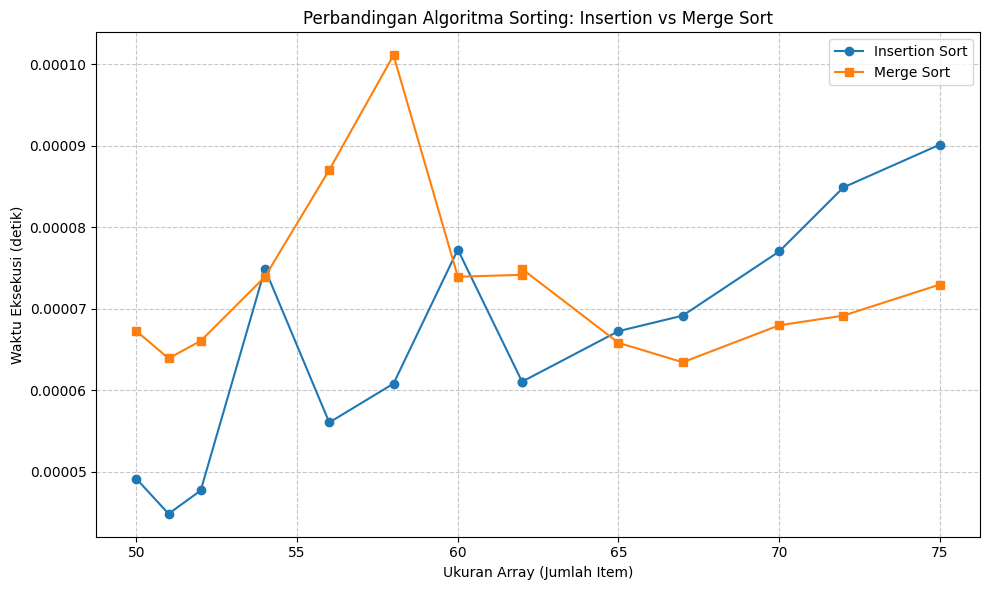

In [45]:
def plot_benchmark(results):
    """
    Memvisualisasikan hasil benchmark dengan grafik.
    """
    if not results:
        return

    plt.figure(figsize=(10, 6))
    plt.plot(results['sizes'], results['insertion_sort_times'], label='Insertion Sort', marker='o', linestyle='-')
    plt.plot(results['sizes'], results['merge_sort_times'], label='Merge Sort', marker='s', linestyle='-')
    
    plt.title('Perbandingan Algoritma Sorting: Insertion vs Merge Sort')
    plt.xlabel('Ukuran Array (Jumlah Item)')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.legend()
    plt.grid(True, linestyle= '--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Tampilkan Grafik
if benchmark_results:
    plot_benchmark(benchmark_results)